<a href="https://colab.research.google.com/github/Tanushree-233/Machine_Learning/blob/main/ML_dimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kidney_disease.csv to kidney_disease.csv


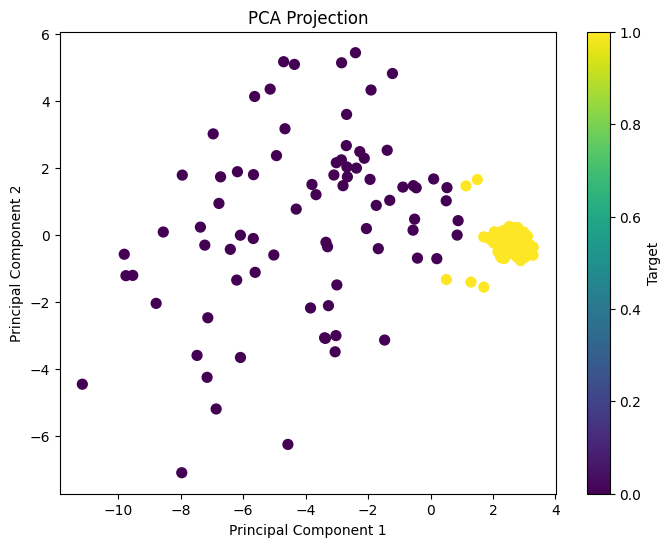

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


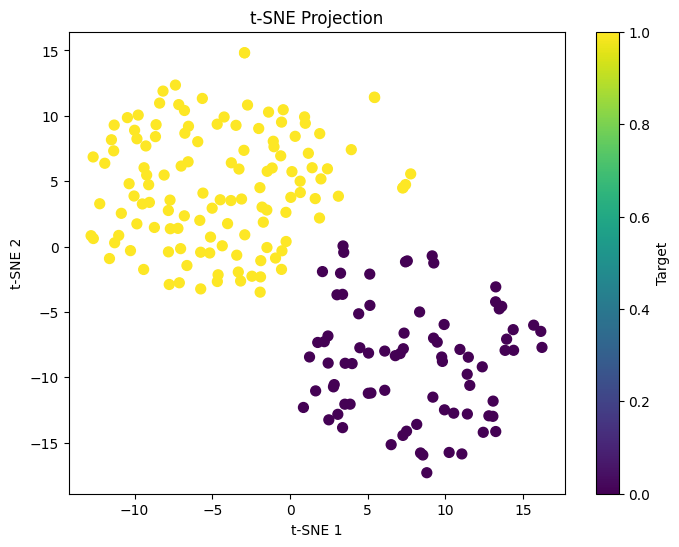

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ------------------------------
# Load dataset
# ------------------------------
df = pd.read_csv('kidney_disease.csv')

# Drop the 'id' column as it's not a feature
df = df.drop('id', axis=1)

# Convert categorical columns to numeric using one-hot encoding
categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
df = pd.get_dummies(df, columns=categorical_cols, dummy_na=False)

# Convert remaining object type columns that are numerical to numeric
for col in ['pcv', 'wc', 'rc']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values created by conversion
df.dropna(inplace=True)

# Separate features and target
X = df.drop('classification', axis=1)  # features
y = df['classification']    # target (for coloring in visualization)

# Convert target to numeric for visualization
y = y.astype('category').cat.codes


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# PCA
# ------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA result
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', s=50)
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Target')
plt.show()

# ------------------------------
# t-SNE
# ------------------------------
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize t-SNE result
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='viridis', s=50)
plt.title("t-SNE Projection")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label='Target')
plt.show()